In [7]:
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


## general fuctions

In [8]:
def to_df(path):
    df = pd.read_csv(path)
    return df

In [9]:
def calculate_matrices(y_true, y_pred):
  #accuracy
  accuracy = (y_true == y_pred).sum() / len(y_true)
  #precision
  precision = (y_true[y_true == y_pred].sum() / y_pred.sum())
  #recall
  recall = (y_true[y_true == y_pred].sum() / y_true.sum())
  #f1
  f1 = 2 * (precision * recall) / (precision + recall)
  print('accuracy: ', accuracy)
  print('precision: ', precision)
  print('recall: ', recall)
  print('f1: ', f1)
  # return accuracy, precision, recall, f1
  return

In [10]:
def explore_errors(df, category):
    errors_per_category = df.groupby(category)['prediction_correct'].apply(lambda x: (x == True).sum() / len(x))
    errors_number_per_category = df.groupby(category)['prediction_correct'].apply(lambda x: x.count())
    #combine both dfs
    errors_per_category = pd.concat([errors_per_category, errors_number_per_category], axis=1)
    errors_per_category.columns = ['accuracy', 'number_of_examples']
    display(errors_per_category)

## read and  pre-process

In [11]:
path_detailed_bert = '/content/test_predictions_distilbert_20250823_161941.csv'

In [12]:
df = to_df(path_detailed_bert)
df

,num_sample,validity,player_type_name,prompt,move_desc,use_of_own_power,use_of_other_power,wrong_use_of_die,board_state,winning,...,many_characters,going_backwards,overloaded_tile,invalid_moves,label,model_name,predicted_label,confidence_illegal,confidence_legal,predicted_validity
0,12,Legal,Double Jumper,We are playing Portal Legends!\nboard pre-move...,"legal warp backwards, legal use of power",1,0,0,0,0.0,...,0,1,0,0.0,1,distilbert,1,0.138203,0.861797,Legal
1,85,Illegal,Mystic,board pre-move:\n Portals:\n 1st portal: 45-6...,מיסטיק לא נכנסת לפורטל,1,0,0,0,0.0,...,1,1,0,0.0,0,distilbert,1,0.205236,0.794764,Legal
2,130,Illegal,Gold Miner,board pre-move:\n Portals:\n 1st portal: 18-...,משתמש בכוח של double jumper ולא בכוח שלו,0,1,0,0,0.0,...,0,0,0,0.0,0,distilbert,0,0.684237,0.315763,Illegal
3,22,Illegal,Double Jumper,We are playing Portal Legends!\n board pre-mov...,no portal use,0,0,0,0,0.0,...,1,0,0,1.0,0,distilbert,0,0.586378,0.413622,Illegal
4,47,Illegal,Double Jumper,We are playing Portal Legends!\n board pre-mov...,wrong portal place post move,1,0,0,1,0.0,...,0,0,0,0.0,0,distilbert,1,0.488292,0.511708,Legal
5,108,Illegal,Gold Miner,board pre-move:\n Portals:\n 1st portal: 27-...,"משחק 6 בתור הראשון במקום 1-4, מטפס בשער",1,0,1,0,1.0,...,0,0,0,0.0,0,distilbert,1,0.207738,0.792262,Legal
6,68,Legal,Mystic,Portals:\n 1st portal: 5-50\n2nd portal: 11-60...,מיסטיק משתמשת בכוח שלה עם 3 פורטלים,1,0,0,0,0.0,...,0,0,0,0.0,1,distilbert,0,0.560235,0.439765,Illegal
7,9,Legal,Double Jumper,We are playing Portal Legends!\nboard pre-move...,"legal warp backwards, legal use of power",1,0,0,0,0.0,...,1,1,1,0.0,1,distilbert,1,0.278395,0.721605,Legal
8,51,Legal,Double Jumper,We are playing Portal Legends!\n board pre-mov...,legal use of power,1,0,0,0,0.0,...,0,0,0,0.0,1,distilbert,1,0.268884,0.731116,Legal
9,118,Illegal,Gold Miner,board pre-move:\n Portals:\n 1st portal: 18-...,זורק 6 בפעם השנייה במקום 1-4,1,0,1,0,0.0,...,0,0,0,0.0,0,distilbert,1,0.118783,0.881217,Legal


In [14]:
df['player_type_name'].value_counts()

,count
player_type_name,
Double Jumper,12
Gold Miner,12
Mystic,7


In [15]:
df[df['player_type_name'] == 'Mystic']

,num_sample,validity,player_type_name,prompt,move_desc,use_of_own_power,use_of_other_power,wrong_use_of_die,board_state,winning,...,many_characters,going_backwards,overloaded_tile,invalid_moves,label,model_name,predicted_label,confidence_illegal,confidence_legal,predicted_validity
1,85,Illegal,Mystic,board pre-move:\n Portals:\n 1st portal: 45-6...,מיסטיק לא נכנסת לפורטל,1,0,0,0,0.0,...,1,1,0,0.0,0,distilbert,1,0.205236,0.794764,Legal
6,68,Legal,Mystic,Portals:\n 1st portal: 5-50\n2nd portal: 11-60...,מיסטיק משתמשת בכוח שלה עם 3 פורטלים,1,0,0,0,0.0,...,0,0,0,0.0,1,distilbert,0,0.560235,0.439765,Illegal
12,86,Illegal,Mystic,board pre-move:\n Portals:\n 1st portal: 46-7...,מיסטיק מטילה פעמיים ומתקדמת,0,0,1,0,0.0,...,1,1,0,0.0,0,distilbert,1,0.460513,0.539486,Legal
13,74,Legal,Mystic,board pre-move:\n Portals:\n 1st portal: 40-6...,מיסטיק- יורדת בהטלה הראשונה,1,0,0,0,0.0,...,1,1,0,0.0,1,distilbert,1,0.429510,0.570490,Legal
20,61,Legal,Mystic,board pre-move:\n Portals:\n 1st portal: 10-3...,מיסטיק משתמשת בכוח שלה,0,0,0,0,0.0,...,0,1,0,0.0,1,distilbert,1,0.477990,0.522010,Legal
22,90,Illegal,Mystic,board pre-move:\n Portals:\n 1st portal: 45-6...,מיסטיק הולכת אחורה,0,0,0,0,0.0,...,0,1,0,1.0,0,distilbert,1,0.217423,0.782577,Legal
30,62,Legal,Mystic,board pre-move:\n Portals:\n 1st portal: 25-60...,מיסטיק משתמשת בכוח שלה,1,0,0,0,0.0,...,0,0,0,NaN,1,distilbert,0,0.659162,0.340838,Illegal


## metrics - general

In [16]:
df['prediction_correct'] = df['label'] == df['predicted_label']

In [17]:
y_true = df['label']
y_pred = df['predicted_label']

calculate_matrices(y_true, y_pred)

accuracy:  0.5806451612903226
precision:  0.56
recall:  0.875
f1:  0.6829268292682927


In [18]:
#how many false positive/false negative out of errors
false_positives = df[(df['label'] == 0) & (df['predicted_label'] == 1)].shape[0]
false_negatives = df[(df['label'] == 1) & (df['predicted_label'] == 0)].shape[0]
numver_of_errors = df[df['prediction_correct'] == False].shape[0]

print(f"Number of Errors: {numver_of_errors}")
print(f"Number of False Positives: {false_positives}")
print(f"Number of False Negatives: {false_negatives}")

Number of Errors: 13
Number of False Positives: 11
Number of False Negatives: 2


##error per category
 ['validity', 'player_type_name', 'use_of_own_power', 'use_of_other_power', 'wrong_use_of_die', 'board_state', 'winning', 'portal', 'many_characters', 'going_backwards', 'overloaded_tile', 'invalid_moves', 'prompt leght']


In [19]:
explore_errors(df, 'validity')

,accuracy,number_of_examples
validity,,
Illegal,0.266667,15
Legal,0.875000,16


In [20]:
explore_errors(df, 'player_type_name')

,accuracy,number_of_examples
player_type_name,,
Double Jumper,0.750000,12
Gold Miner,0.583333,12
Mystic,0.285714,7


In [21]:
explore_errors(df, 'use_of_own_power')

,accuracy,number_of_examples
use_of_own_power,,
0,0.777778,9
1,0.500000,22


In [22]:
explore_errors(df, 'use_of_other_power')

,accuracy,number_of_examples
use_of_other_power,,
0,0.571429,28
1,0.666667,3


In [23]:
explore_errors(df, 'wrong_use_of_die')

,accuracy,number_of_examples
wrong_use_of_die,,
0,0.653846,26
1,0.200000,5


In [24]:
explore_errors(df, 'board_state')

,accuracy,number_of_examples
board_state,,
0,0.607143,28
1,0.333333,3


In [25]:
# error analysis by prompt length
df_for_prompt_length = df[['prompt', 'prediction_correct']].copy()
df_for_prompt_length['prompt_length'] = df_for_prompt_length['prompt'].apply(lambda x: len(x))
explore_errors(df_for_prompt_length, 'prompt_length')
df_for_prompt_length.head()

,accuracy,number_of_examples
prompt_length,,
211,0.000000,1
230,1.000000,1
240,1.000000,1
260,0.000000,2
261,0.666667,3
267,1.000000,2
284,1.000000,1
285,1.000000,1
288,0.000000,1


,prompt,prediction_correct,prompt_length
0,We are playing Portal Legends!\nboard pre-move...,True,267
1,board pre-move:\n Portals:\n 1st portal: 45-6...,False,381
2,board pre-move:\n Portals:\n 1st portal: 18-...,True,267
3,We are playing Portal Legends!\n board pre-mov...,True,284
4,We are playing Portal Legends!\n board pre-mov...,False,260


/tmp/ipython-input-821881960.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_for_prompt_length, x='prompt_length', y='prediction_correct', inner='stick', palette='Dark2')


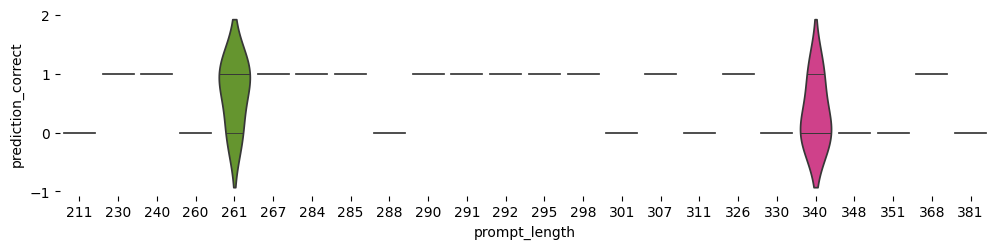

In [26]:
# @title prediction_correct vs prompt_length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_for_prompt_length['prediction_correct'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_for_prompt_length, x='prompt_length', y='prediction_correct', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)